# Analysis of Running Back stats
ATTENTION: These stats are moot because yards/carry and yards/tgt would be better for analysis of the value of a carry vs target. <br>
However, this is still a good example of running a linear model on a set of data to be referenced in the future, <br>
as well as a nice example of using matplotlib to plot 3D figures.

In [1]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# load csv and filter data
data = pd.read_csv(f"../data/base/sts_ALL.csv")
data = data[data.Pos=="RB"]
data = data[data.rushAtt >= 100]

In [3]:
# calculate averages and reduce data
data["Avg"] = data["PPR"]/data["G"]
data["Tgt/G"] = data["Tgt"]/data["G"]
data["Att/G"] = data["rushAtt"]/data["G"]
data_reduced = data[["Att/G","Tgt/G","Avg"]]

In [4]:
# create training and testing datasets from random samples of data
train = data_reduced.sample(frac=0.8)
test = data_reduced.sample(frac=0.2)
trainX = torch.tensor(train.values, dtype=torch.float64)[...,:-1]
trainY = torch.tensor(train.values, dtype=torch.float64)[...,-1:]
testX = torch.tensor(test.values, dtype=torch.float64)[...,:-1]
testY = torch.tensor(test.values, dtype=torch.float64)[...,-1:]

In [5]:
# compare predicted and test values via R^2
def r2_score(test,predicted):
    SStot = sum(torch.sub(test,torch.mean(test))**2)
    SSreg = sum(torch.sub(test,predicted)**2)
    improvement = SStot - SSreg
    return (improvement/SStot)

In [6]:
# create TensorDataset
train_ds = torch.utils.data.TensorDataset(trainX.to(dtype=torch.float32),
                                          trainY.to(dtype=torch.float32))

# create DataLoader
train_dl = torch.utils.data.DataLoader(train_ds,shuffle=True,batch_size=32)

# create linear model
model = torch.nn.Linear(2, 1)

# create optimizer
optimizer = torch.optim.SGD([model.weight, model.bias], lr=0.001)

# calculate loss
loss_fn = torch.nn.MSELoss()

In [7]:
# optimize model using data from the DataLoader
for epoch in range(100):
    for batchx, batchy in train_dl:
        predictedy = model(batchx)
        loss = loss_fn(batchy, predictedy)
        loss.backward()         # update weight.grad and bias.grad
        optimizer.step()        # update weight and bias based on the gradients
        optimizer.zero_grad()   # weight.grad = 0 and bias.grad = 0

In [8]:
# report r2 score
predictedY = testX @ torch.reshape(model.weight, (2,1)).to(dtype=torch.float64)
print(f"R2 Score:\n{r2_score(testY,predictedY)}\n\nModel Weights:\n{model.weight}")

R2 Score:
tensor([0.6885], dtype=torch.float64, grad_fn=<DivBackward0>)

Model Weights:
Parameter containing:
tensor([[0.6042, 1.6611]], requires_grad=True)


In [14]:
x = data_reduced["Att/G"]
y = data_reduced["Tgt/G"]
z = data_reduced["Avg"]

x2 = np.arange(0,30,0.3)
y2 = np.arange(0,10,0.1)
z2 = 0.6042*x2 + 1.6611*y2

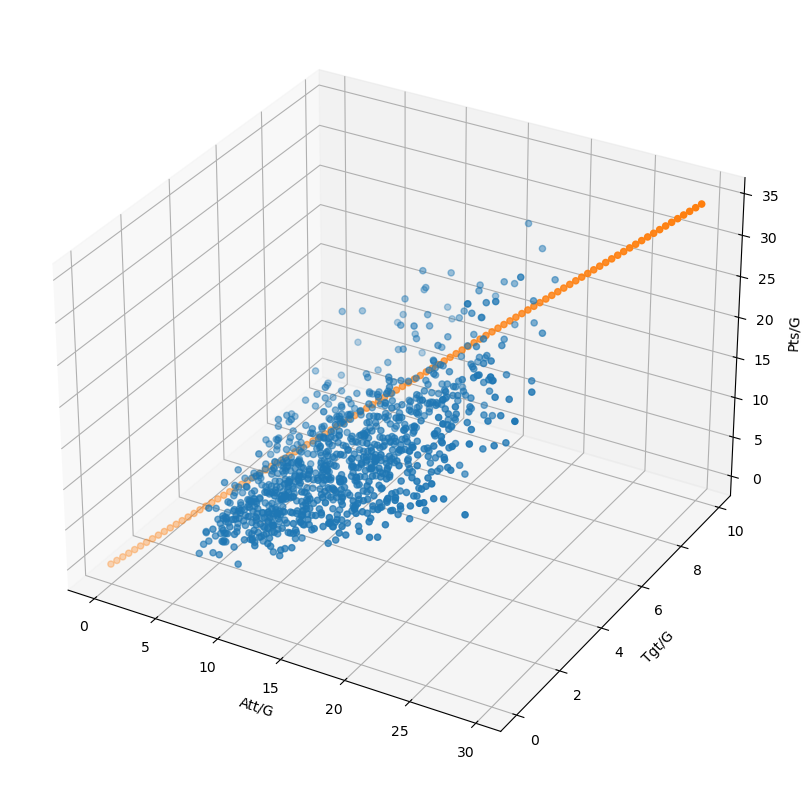

In [20]:
fig = plt.figure(figsize=(10,10))

ax = plt.axes(projection='3d')

ax.scatter(x,y,z)
ax.scatter(x2,y2,z2)
ax.set_xlabel('Att/G')
ax.set_ylabel('Tgt/G')
ax.set_zlabel('Pts/G')

plt.draw()

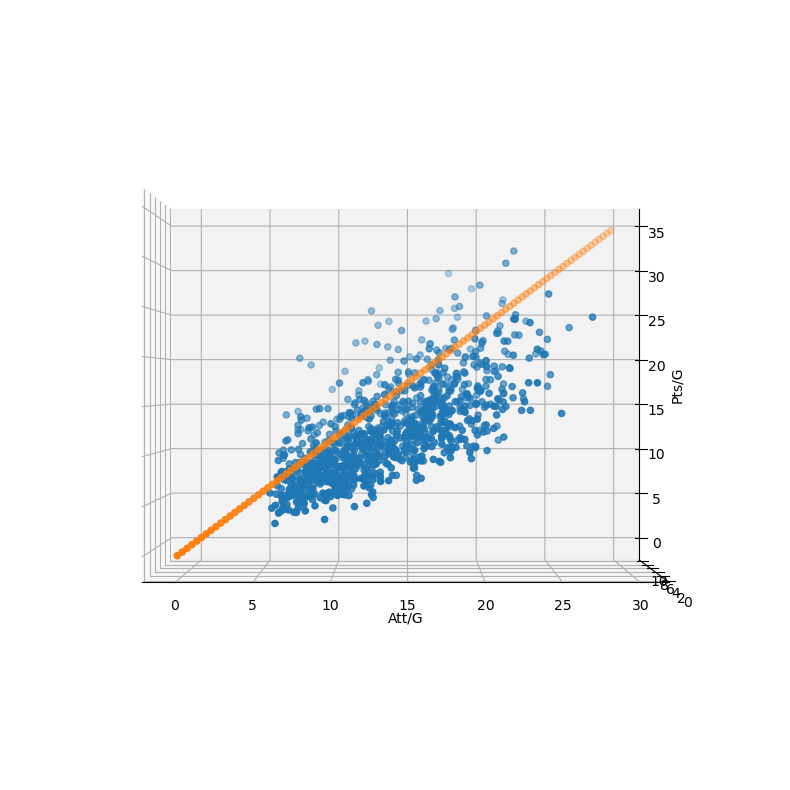

In [19]:
fig = plt.figure(figsize=(10,10))

ax = plt.axes(projection='3d')

ax.scatter(x,y,z)
ax.scatter(x2,y2,z2)
ax.set_xlabel('Att/G')
# ax.set_ylabel('Tgt/G')
ax.set_zlabel('Pts/G')

ax.view_init(0, -90)
plt.draw()

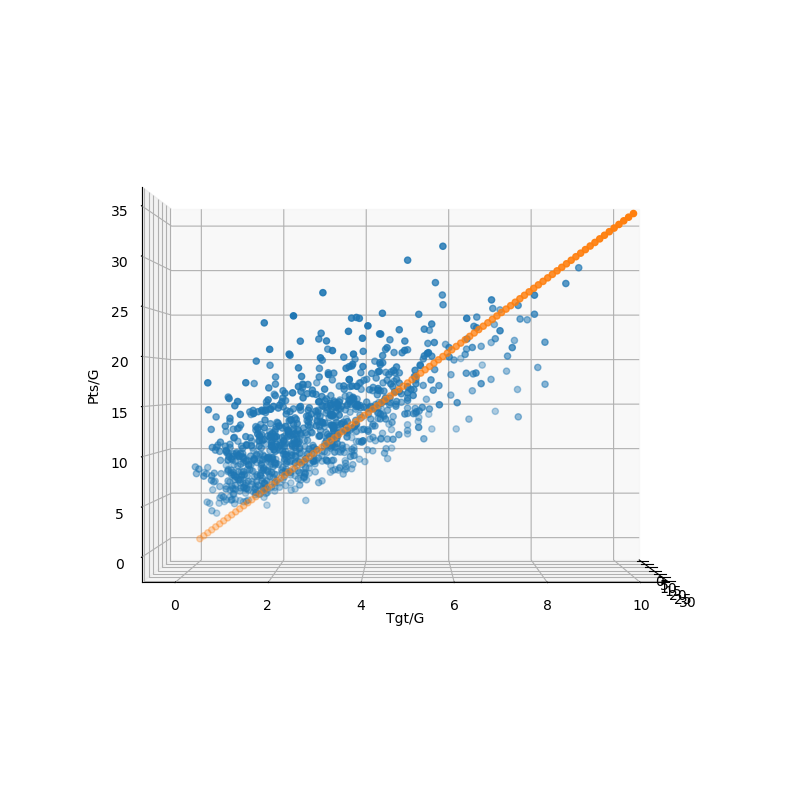

In [18]:
fig = plt.figure(figsize=(10,10))

ax = plt.axes(projection='3d')

ax.scatter(x,y,z)
ax.scatter(x2,y2,z2)
# ax.set_xlabel('Att/G')
ax.set_ylabel('Tgt/G')
ax.set_zlabel('Pts/G')

ax.view_init(0, 0)
plt.draw()

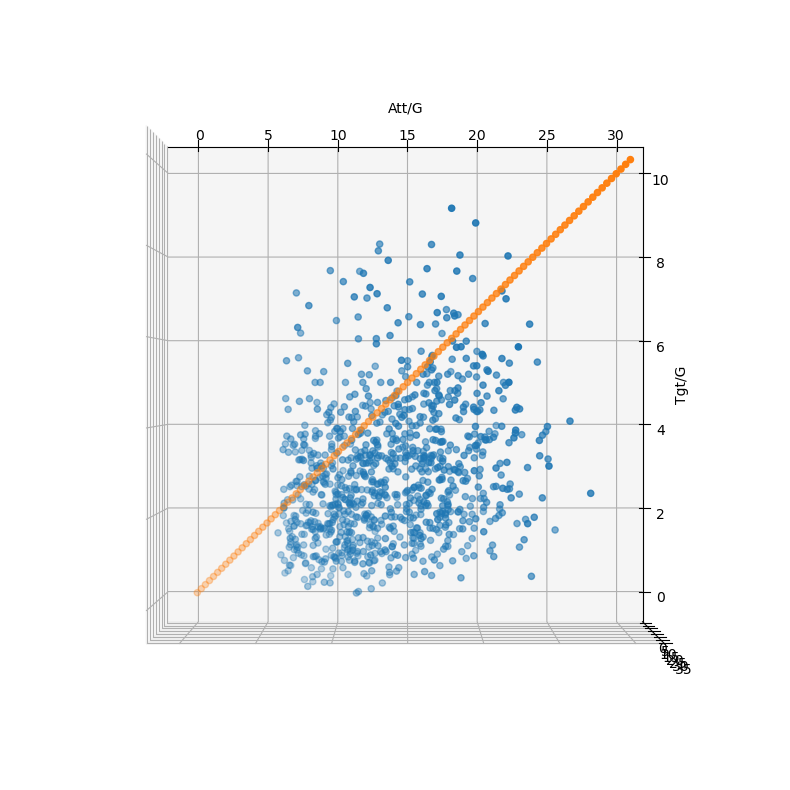

In [17]:
fig = plt.figure(figsize=(10,10))

ax = plt.axes(projection='3d')

ax.scatter(x,y,z)
ax.scatter(x2,y2,z2)
ax.set_xlabel('Att/G')
ax.set_ylabel('Tgt/G')
# ax.set_zlabel('Avg')

ax.view_init(90, -90)
plt.draw()